### Hilbert DDPM for 1D toy example

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from util import get_V_and_A,get_x_0_for_1D_DDPM,gp_sampler,np2torch
from ddpm import get_ddpm_constants,plot_ddpm_constants,ddpm_train_wrapper
from model import DenoisingDenseUNetClass
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('xtick',labelsize=5); plt.rc('ytick',labelsize=5)
print ("Ready.")

Ready.


### Diffusion constants

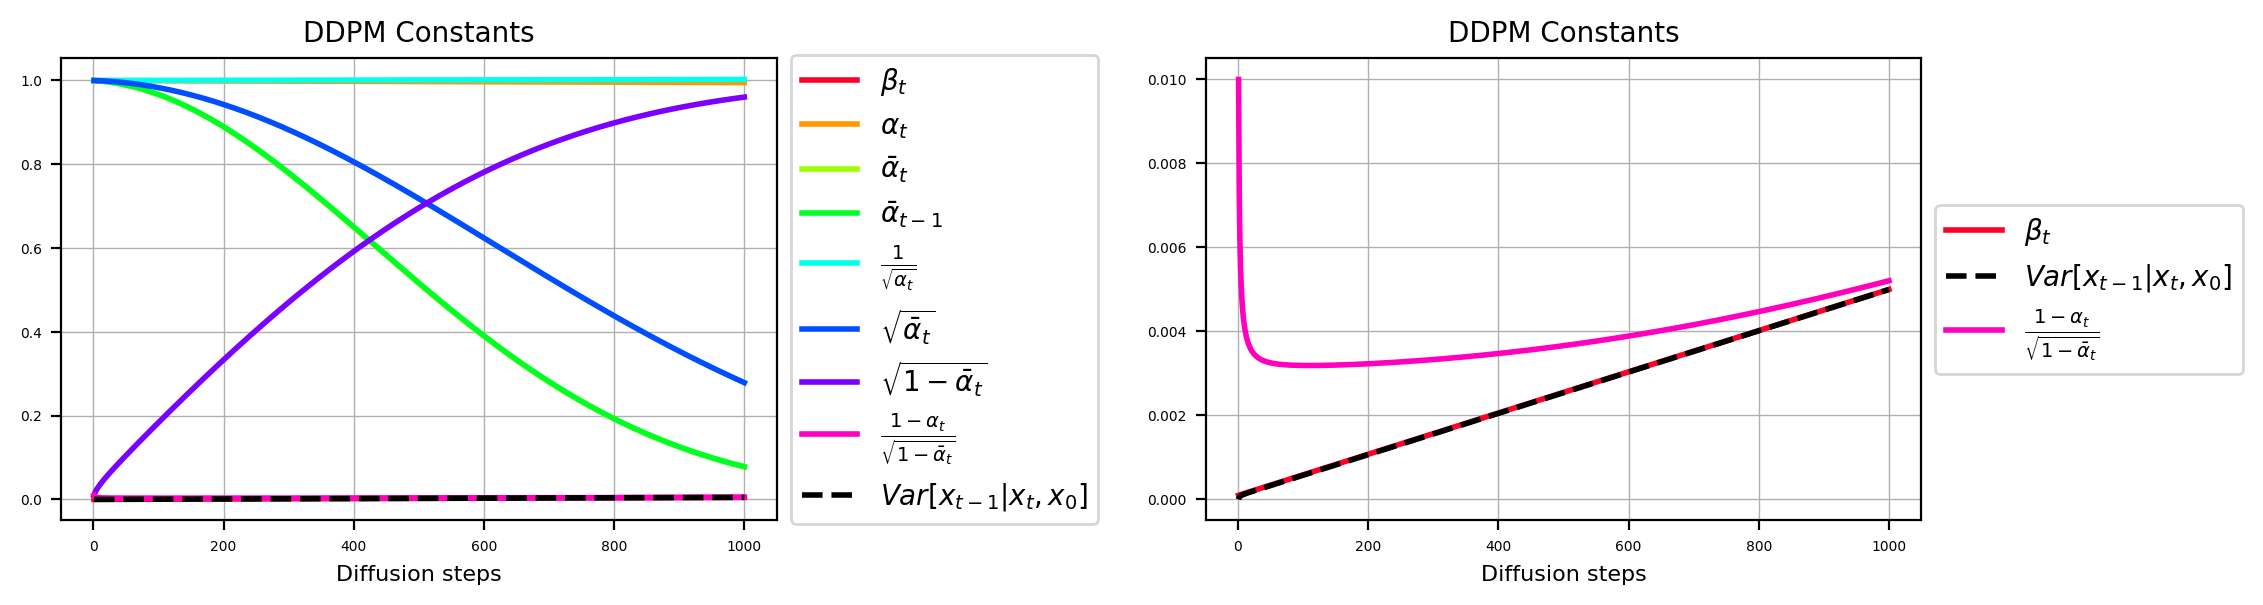

In [2]:
# Smaller `beta_end` tends to show better performances
dc = get_ddpm_constants(beta_start=1e-4,beta_end=5e-3,diffusion_step=1000)
plot_ddpm_constants(dc,figsize=(12,3))

### Commmon hyper-parameters

In [3]:
BATCH_SIZE,D,L = 128,1,100
base_lr,MAX_ITER = 1e-3,50000
actv = nn.ReLU() # nn.GELU(), nn.ReLU()
l1_w,l2_w,huber_w,smt_l1_w = 1.0,1.0,0.0,0.0
device = 'cpu' # cpu / mps
print ("Ready.")

Ready.


### Training data

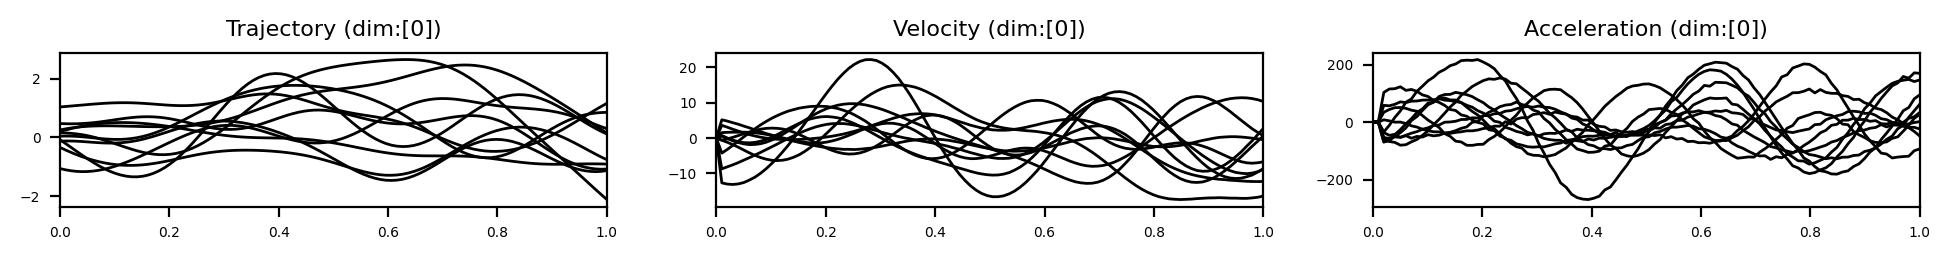

Ready.


In [4]:
times = np.linspace(start=0.0,stop=1.0,num=L).reshape((-1,1)) # [L x 1]
x_0,V,A = get_x_0_for_1D_DDPM(times,D=1,M=10,USE_SINGLE_TRAJECTORY=False,device='cpu')
print ("Ready.")

### Diffusion DDPM 

[0/50000][0.00%] loss:[2.257]
  [l1]:[0.901]
  [l2]:[1.302]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.055]


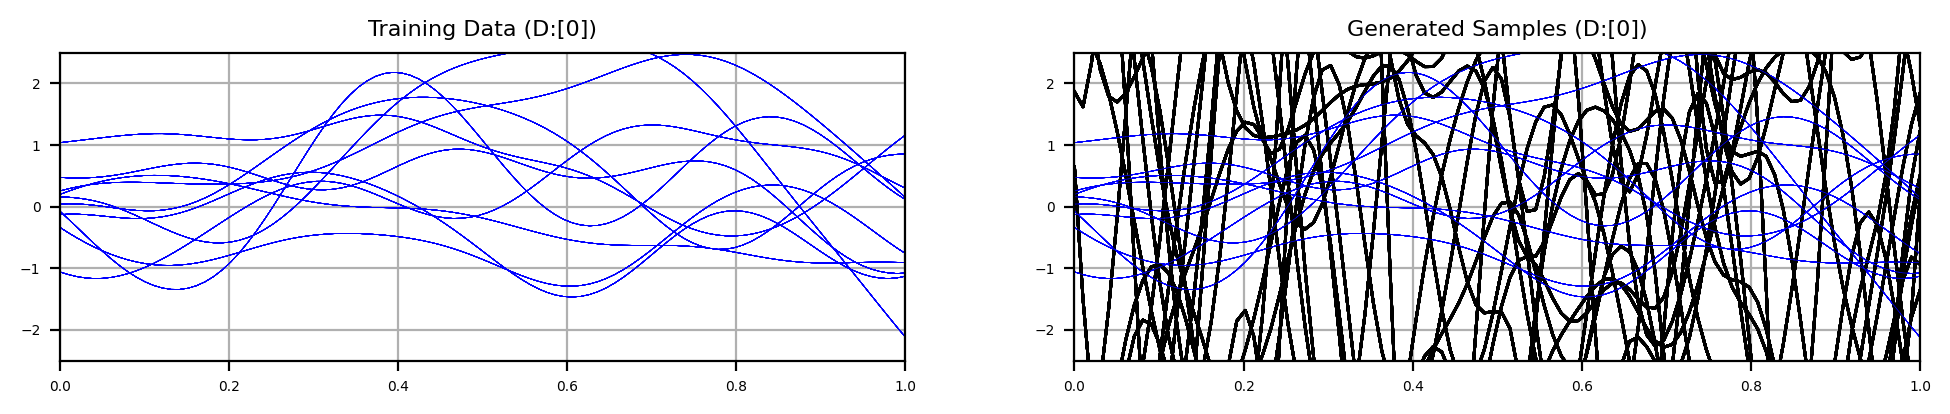

[2500/50000][5.00%] loss:[0.439]
  [l1]:[0.278]
  [l2]:[0.153]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[5000/50000][10.00%] loss:[0.427]
  [l1]:[0.271]
  [l2]:[0.150]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


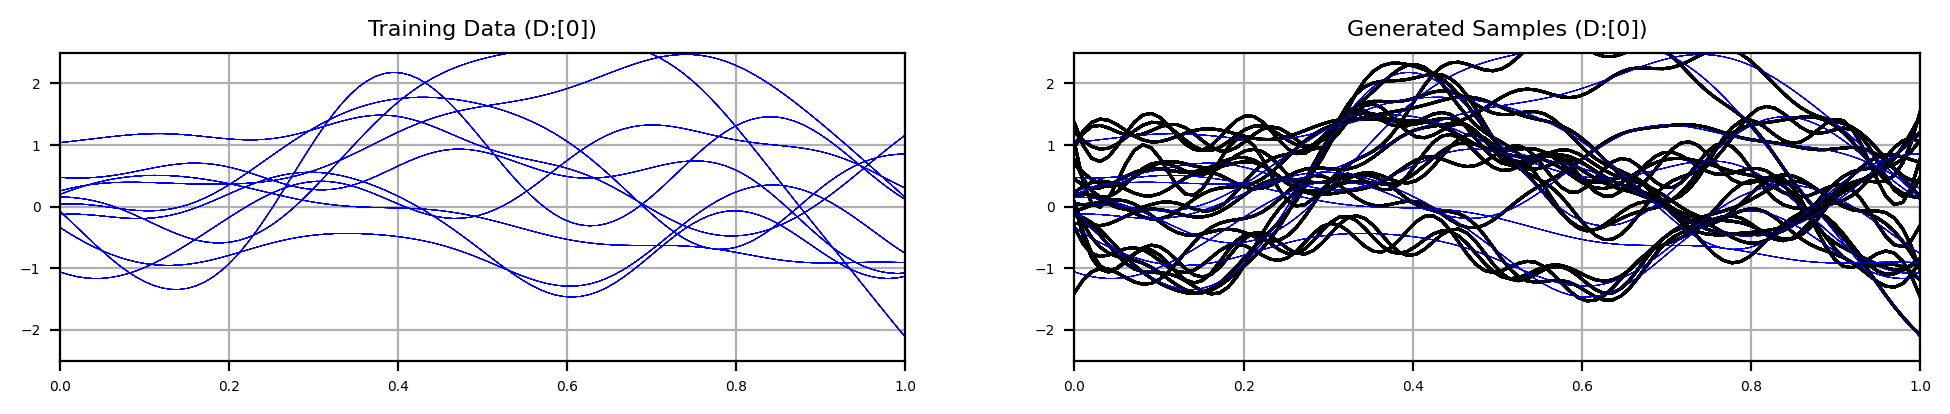

[7500/50000][15.00%] loss:[0.396]
  [l1]:[0.252]
  [l2]:[0.136]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[10000/50000][20.00%] loss:[0.440]
  [l1]:[0.275]
  [l2]:[0.159]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


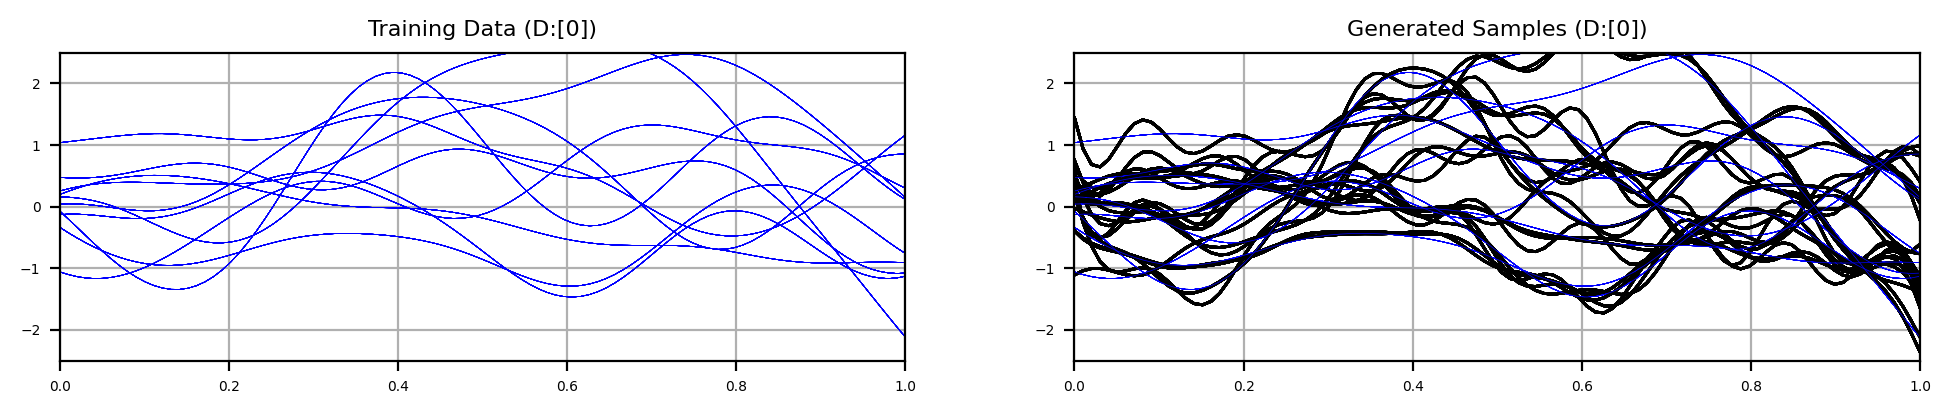

[12500/50000][25.00%] loss:[0.450]
  [l1]:[0.267]
  [l2]:[0.175]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[15000/50000][30.00%] loss:[0.338]
  [l1]:[0.223]
  [l2]:[0.108]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


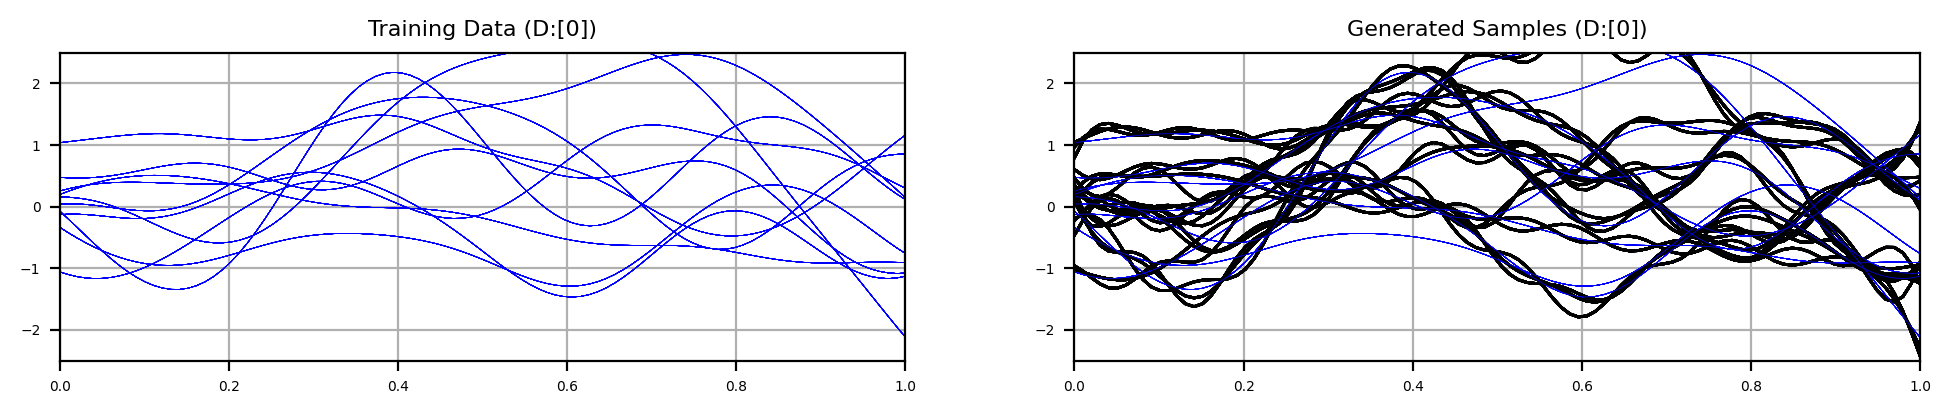

[17500/50000][35.00%] loss:[0.436]
  [l1]:[0.261]
  [l2]:[0.168]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[20000/50000][40.00%] loss:[0.325]
  [l1]:[0.217]
  [l2]:[0.100]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


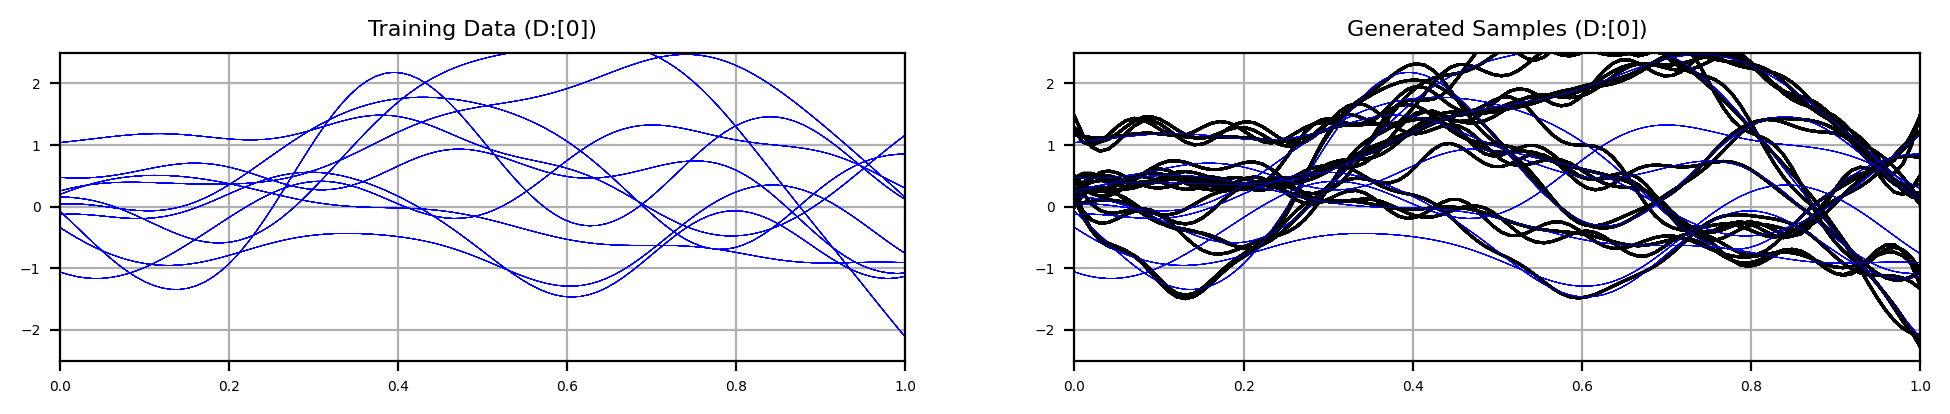

[22500/50000][45.00%] loss:[0.447]
  [l1]:[0.272]
  [l2]:[0.167]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[25000/50000][50.00%] loss:[0.385]
  [l1]:[0.241]
  [l2]:[0.136]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]


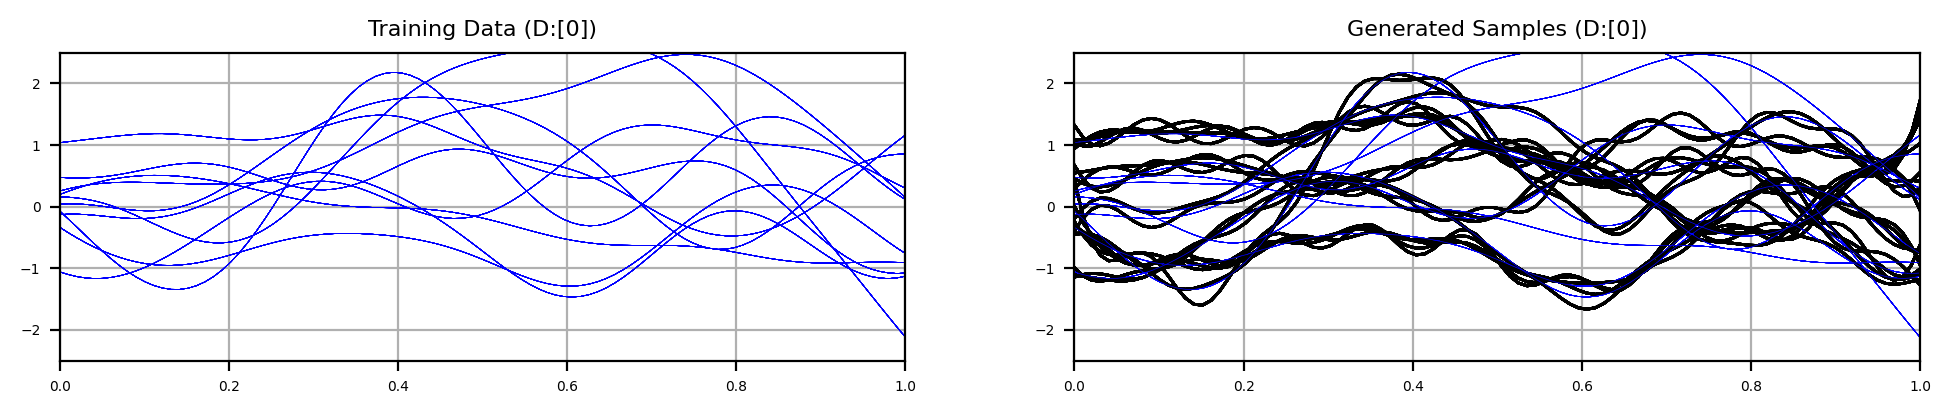

[27500/50000][55.00%] loss:[0.369]
  [l1]:[0.240]
  [l2]:[0.122]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[30000/50000][60.00%] loss:[0.356]
  [l1]:[0.220]
  [l2]:[0.129]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


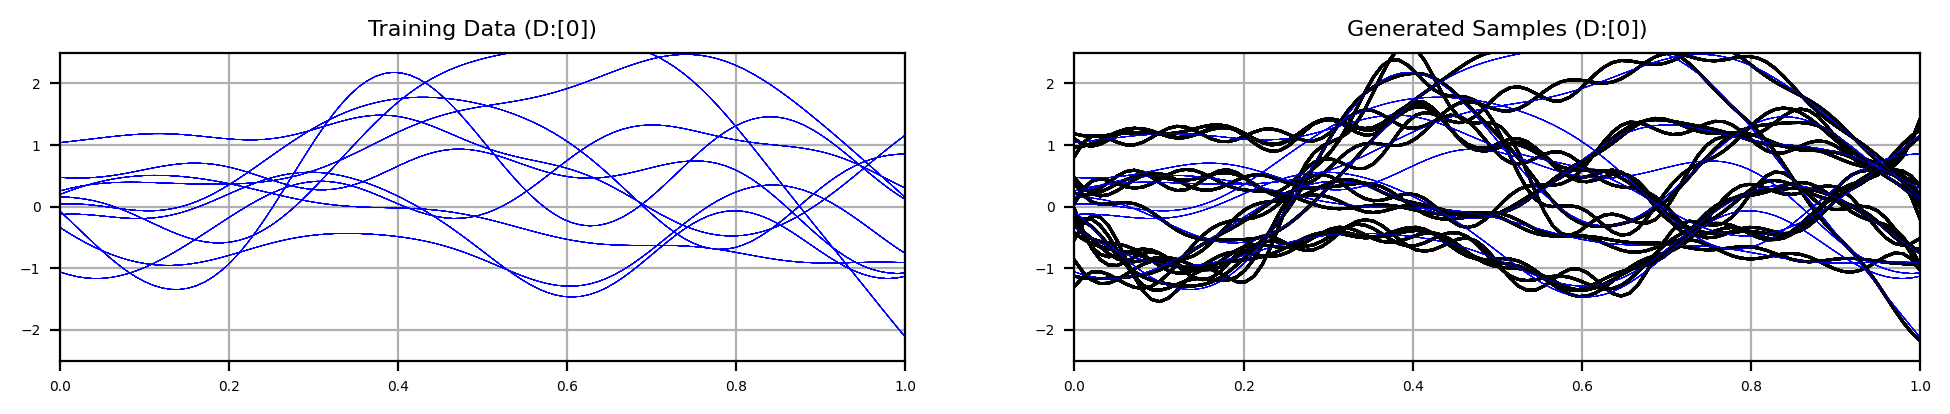

[32500/50000][65.00%] loss:[0.380]
  [l1]:[0.232]
  [l2]:[0.141]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[35000/50000][70.00%] loss:[0.357]
  [l1]:[0.232]
  [l2]:[0.118]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


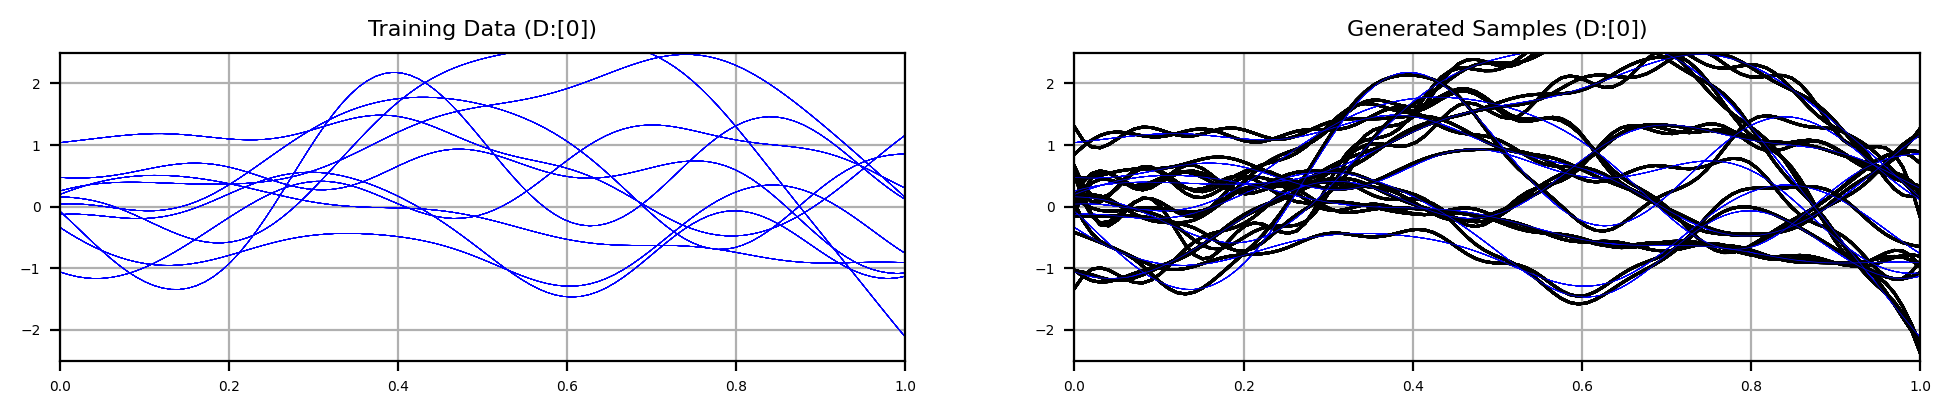

[37500/50000][75.00%] loss:[0.457]
  [l1]:[0.274]
  [l2]:[0.175]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[40000/50000][80.00%] loss:[0.378]
  [l1]:[0.230]
  [l2]:[0.141]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]


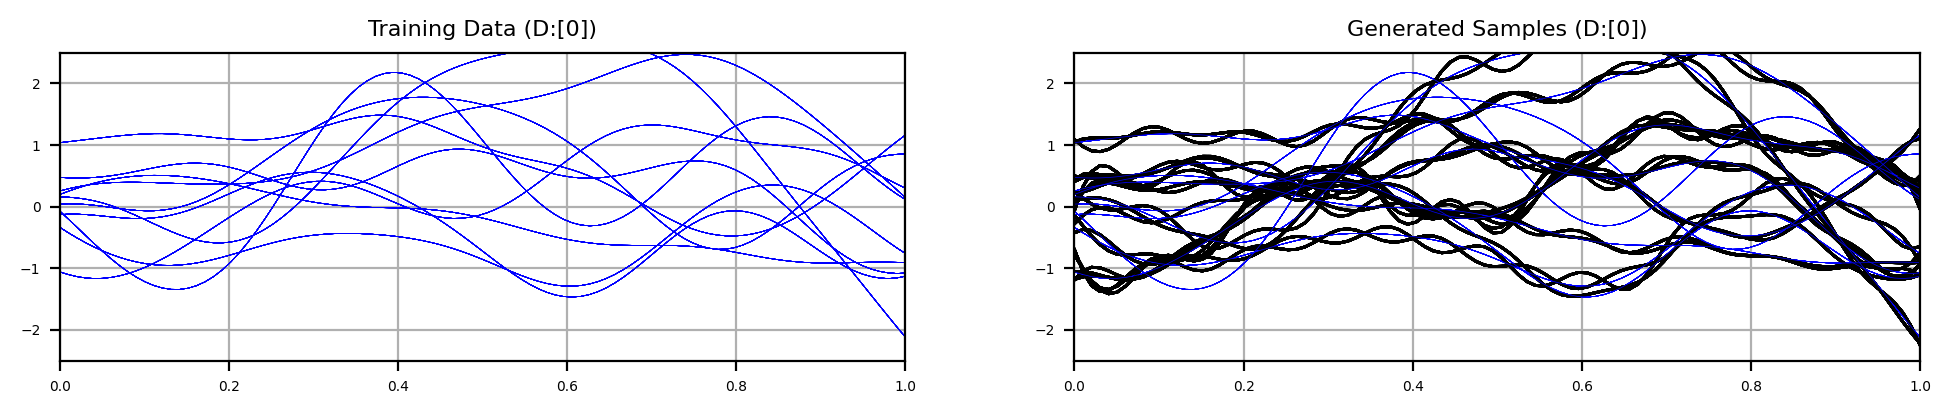

[42500/50000][85.00%] loss:[0.366]
  [l1]:[0.236]
  [l2]:[0.123]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.007]
[45000/50000][90.00%] loss:[0.396]
  [l1]:[0.248]
  [l2]:[0.140]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]


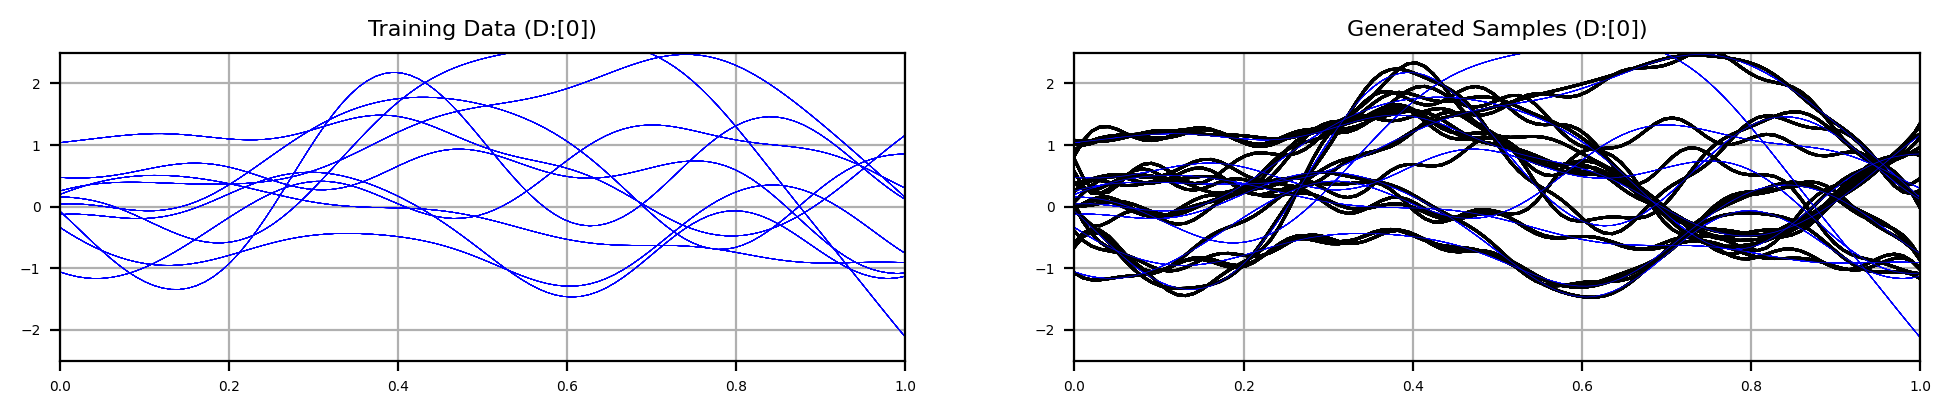

[47500/50000][95.00%] loss:[0.363]
  [l1]:[0.223]
  [l2]:[0.132]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]
[49999/50000][100.00%] loss:[0.348]
  [l1]:[0.225]
  [l2]:[0.115]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.008]


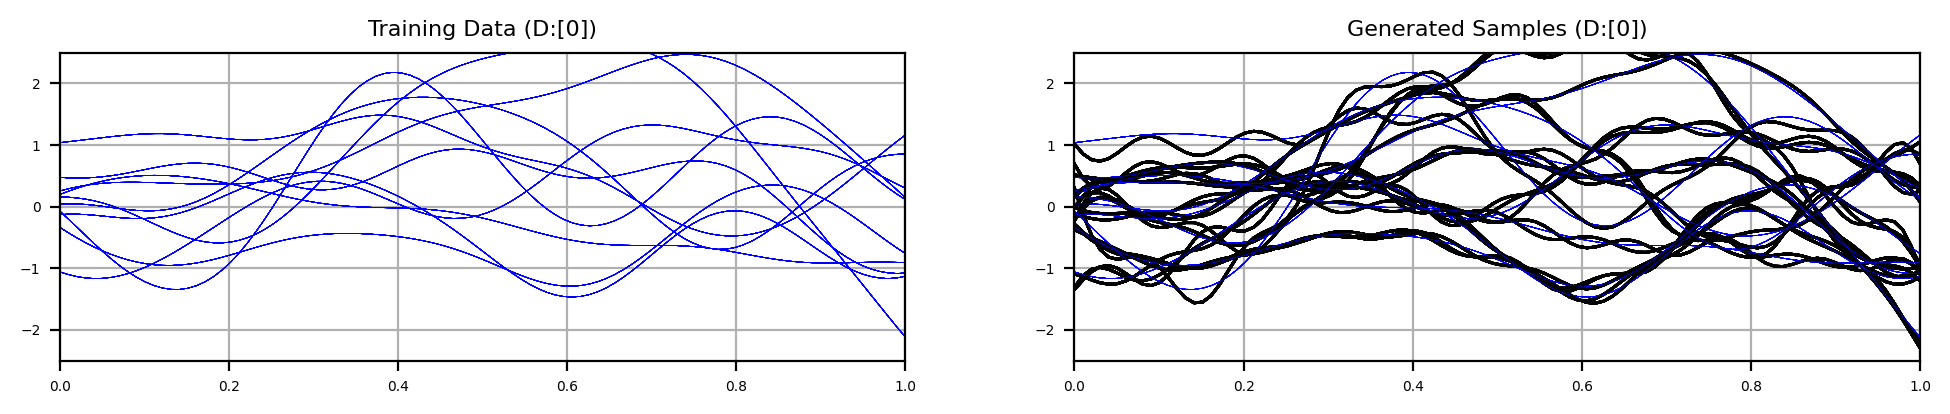

Done.


In [5]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.1,hyp_len_projection=0.1,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=1e-6,acc_w=1e-6,
    RKHS_PROJECTION_EACH_X_T=True,device='cpu')
print ("Done.")

### Baseline

[0/50000][0.00%] loss:[3.103]
  [l1]:[1.102]
  [l2]:[2.001]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


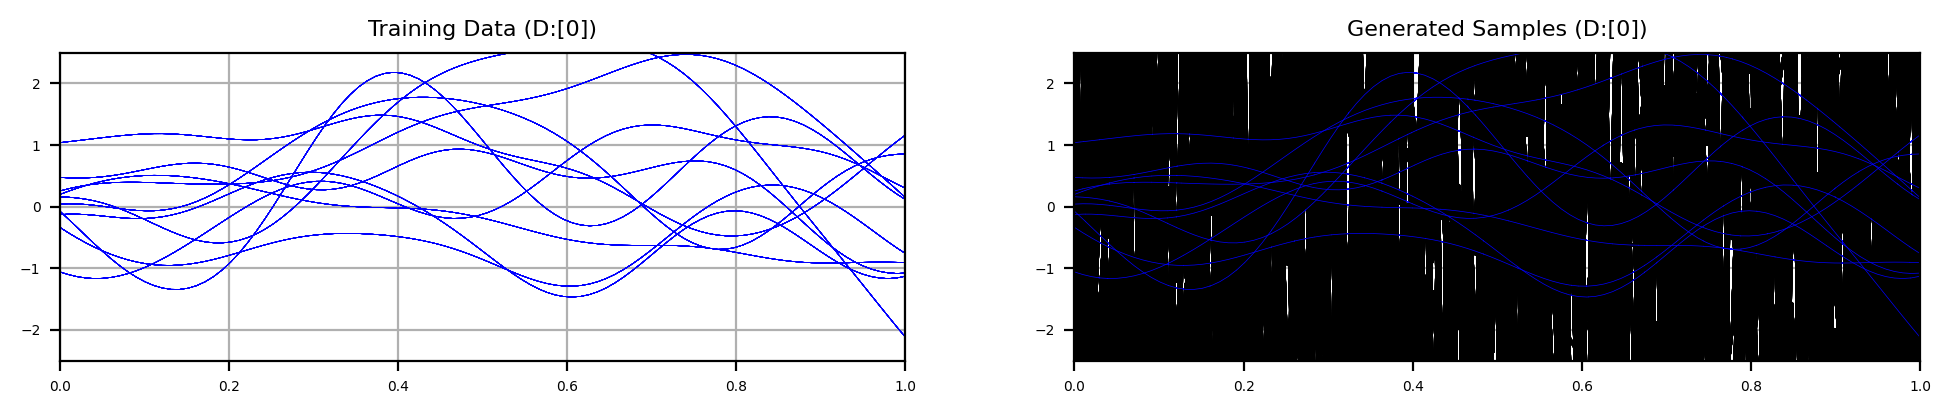

[2500/50000][5.00%] loss:[0.460]
  [l1]:[0.284]
  [l2]:[0.175]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] loss:[0.476]
  [l1]:[0.291]
  [l2]:[0.185]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


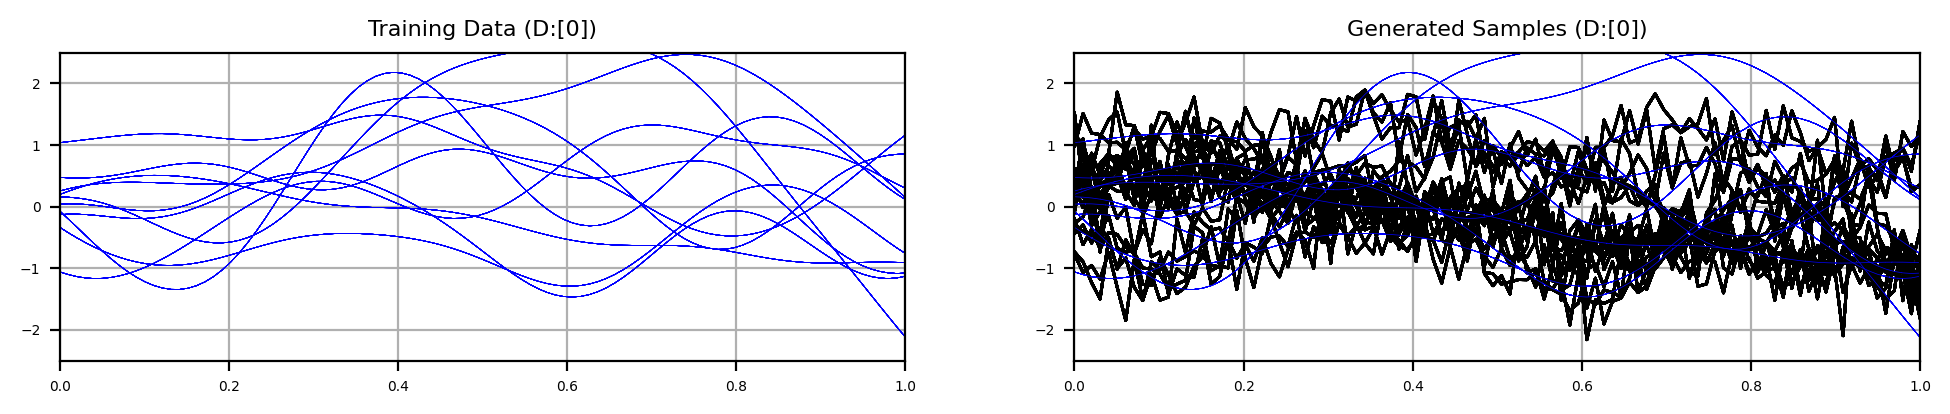

[7500/50000][15.00%] loss:[0.467]
  [l1]:[0.285]
  [l2]:[0.182]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] loss:[0.469]
  [l1]:[0.290]
  [l2]:[0.180]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


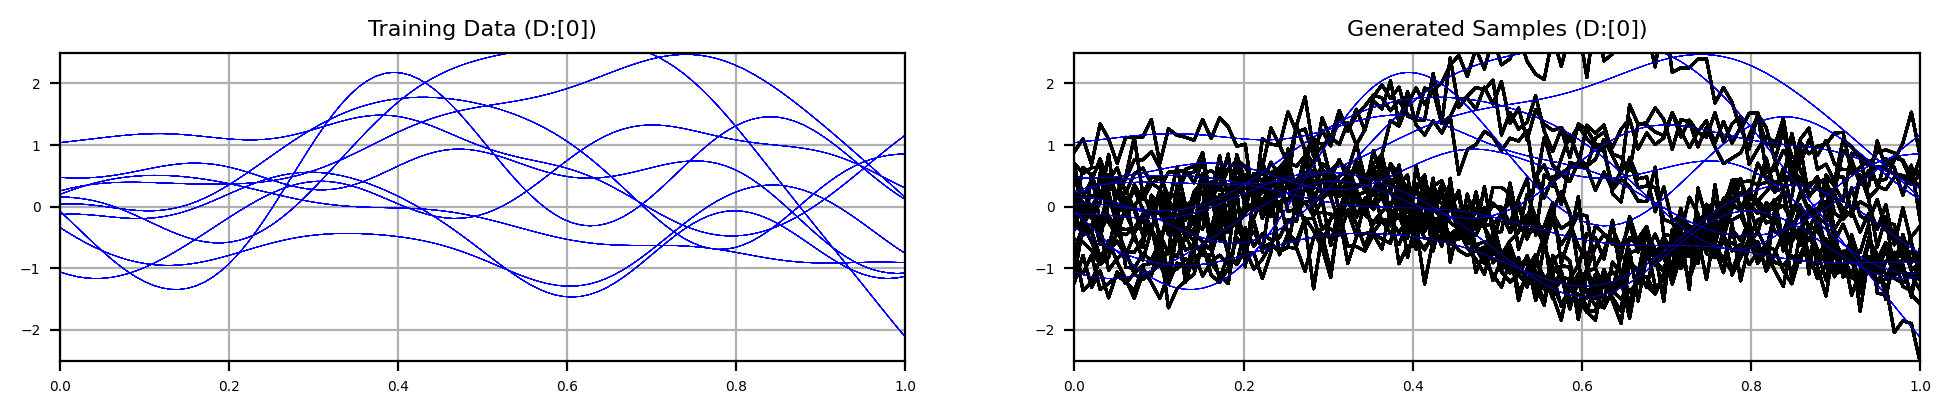

[12500/50000][25.00%] loss:[0.505]
  [l1]:[0.300]
  [l2]:[0.205]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[15000/50000][30.00%] loss:[0.447]
  [l1]:[0.274]
  [l2]:[0.173]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


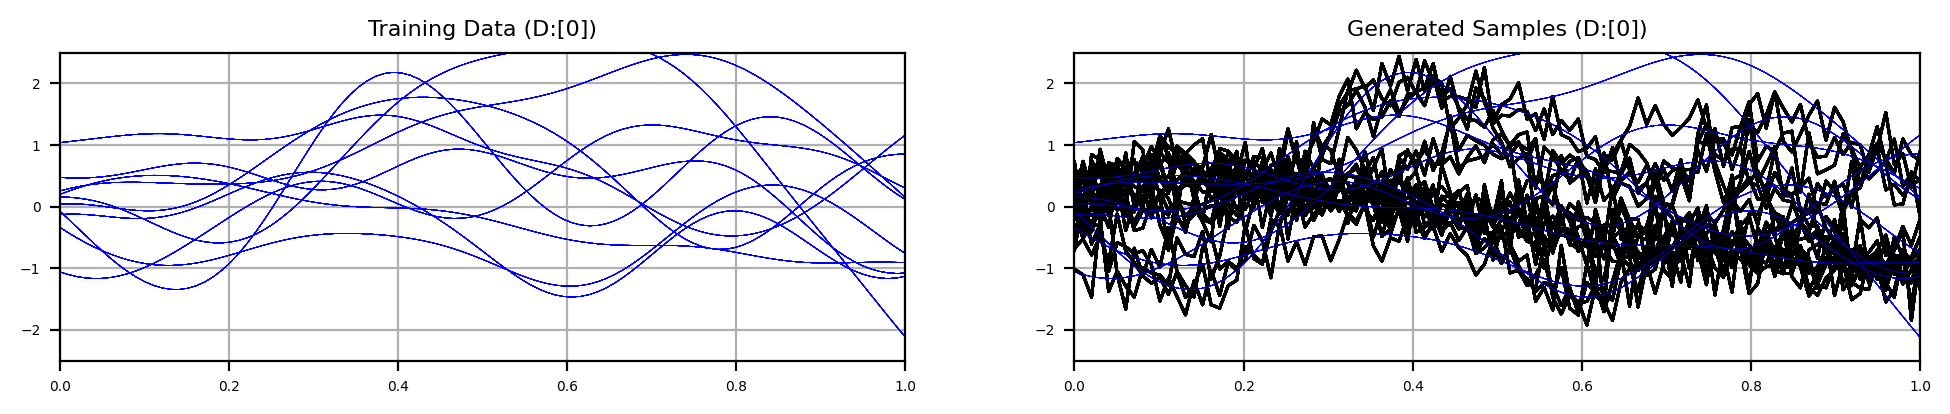

[17500/50000][35.00%] loss:[0.398]
  [l1]:[0.252]
  [l2]:[0.145]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[20000/50000][40.00%] loss:[0.419]
  [l1]:[0.261]
  [l2]:[0.157]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


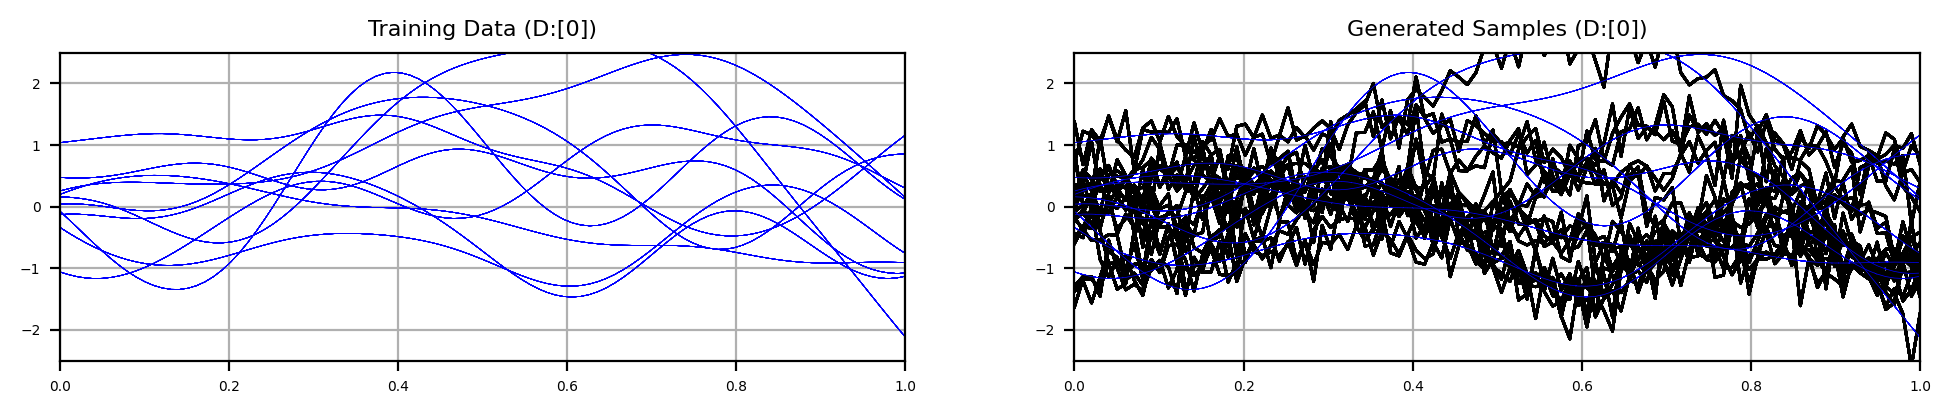

[22500/50000][45.00%] loss:[0.402]
  [l1]:[0.255]
  [l2]:[0.147]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[25000/50000][50.00%] loss:[0.409]
  [l1]:[0.259]
  [l2]:[0.151]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


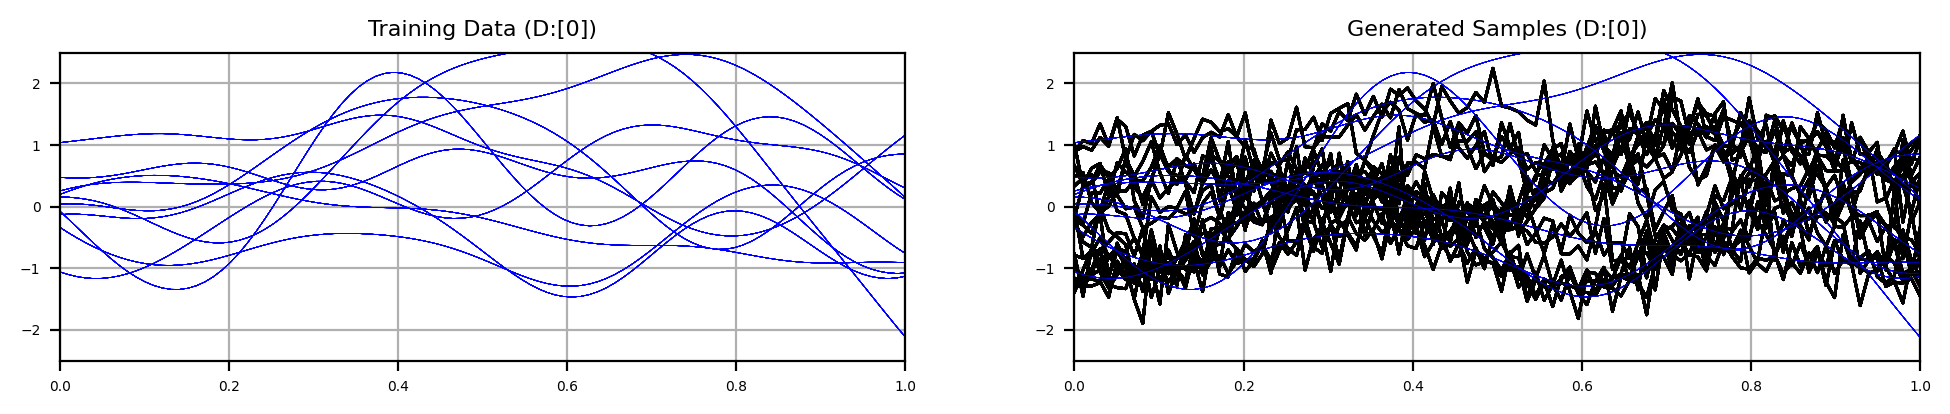

[27500/50000][55.00%] loss:[0.399]
  [l1]:[0.255]
  [l2]:[0.144]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[30000/50000][60.00%] loss:[0.371]
  [l1]:[0.238]
  [l2]:[0.133]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


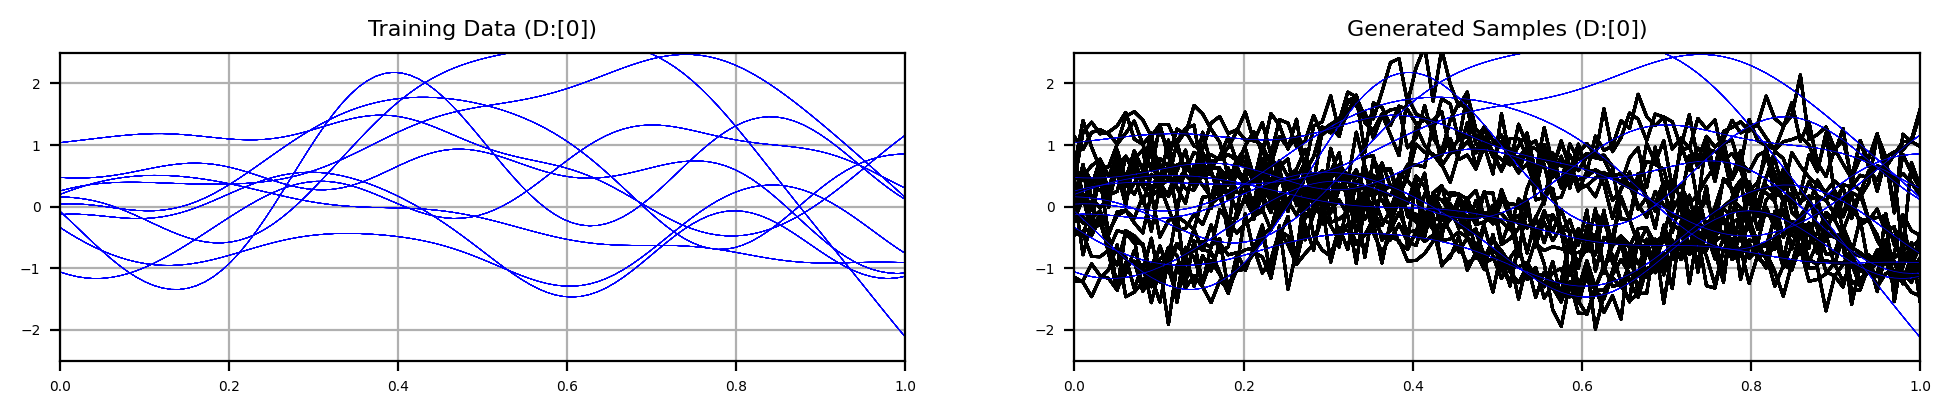

[32500/50000][65.00%] loss:[0.421]
  [l1]:[0.262]
  [l2]:[0.159]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[35000/50000][70.00%] loss:[0.341]
  [l1]:[0.222]
  [l2]:[0.119]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


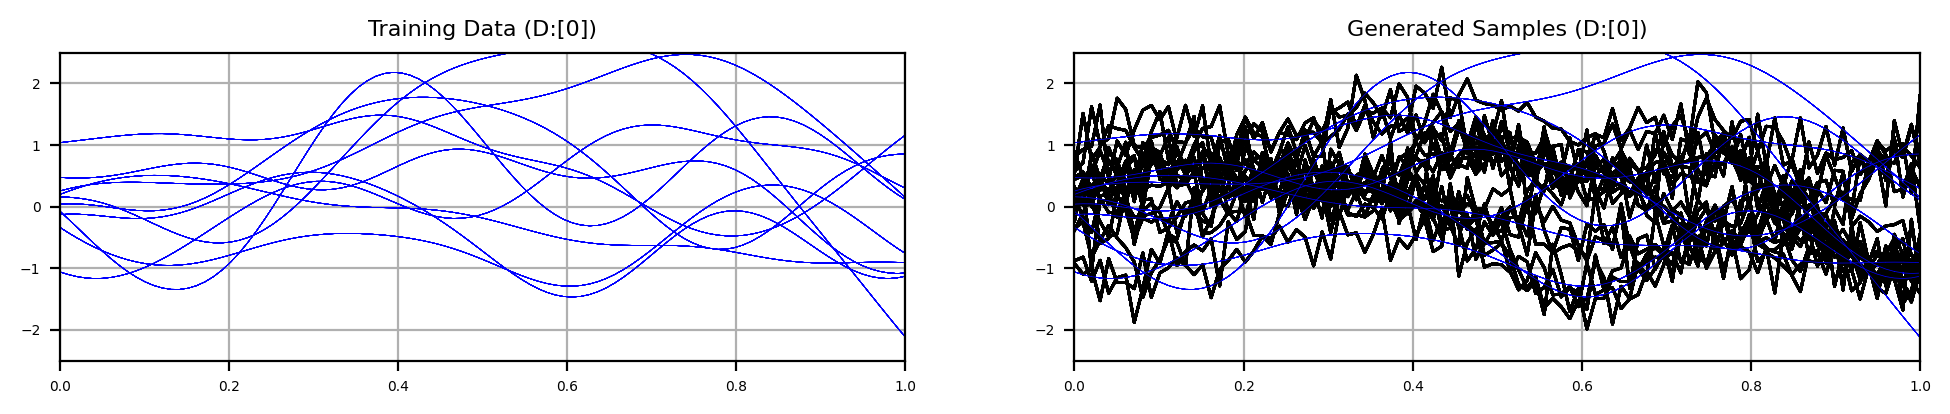

[37500/50000][75.00%] loss:[0.379]
  [l1]:[0.244]
  [l2]:[0.136]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[40000/50000][80.00%] loss:[0.390]
  [l1]:[0.249]
  [l2]:[0.141]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


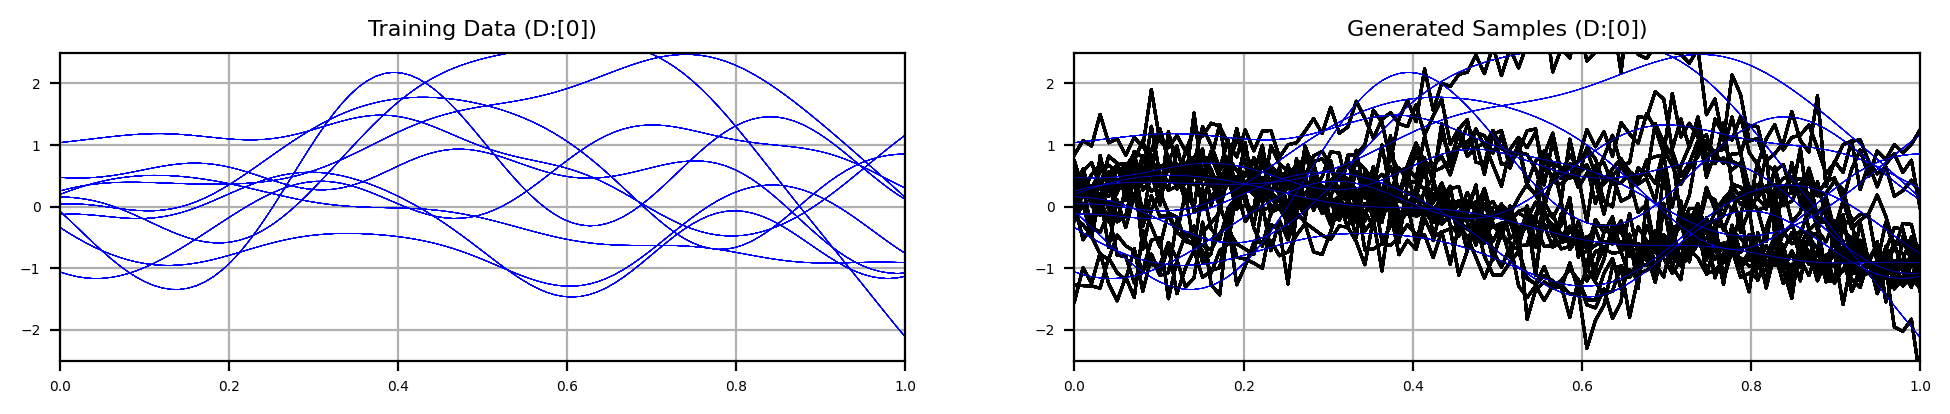

[42500/50000][85.00%] loss:[0.393]
  [l1]:[0.250]
  [l2]:[0.143]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[45000/50000][90.00%] loss:[0.421]
  [l1]:[0.264]
  [l2]:[0.157]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


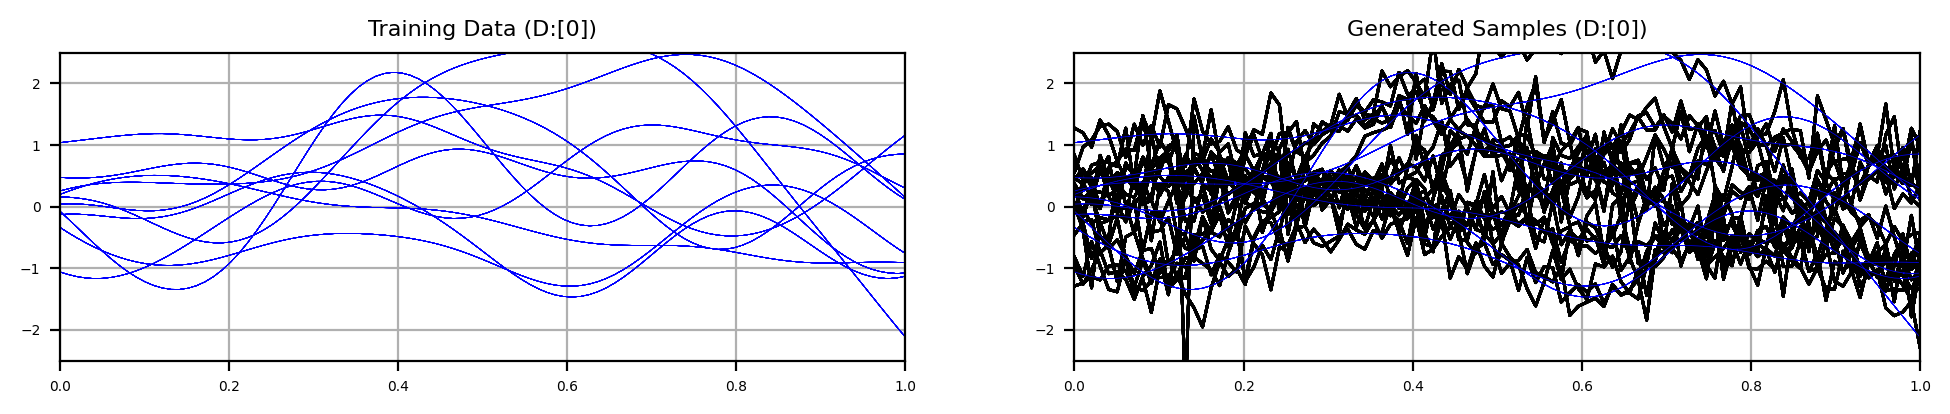

[47500/50000][95.00%] loss:[0.430]
  [l1]:[0.265]
  [l2]:[0.164]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[49999/50000][100.00%] loss:[0.346]
  [l1]:[0.224]
  [l2]:[0.121]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


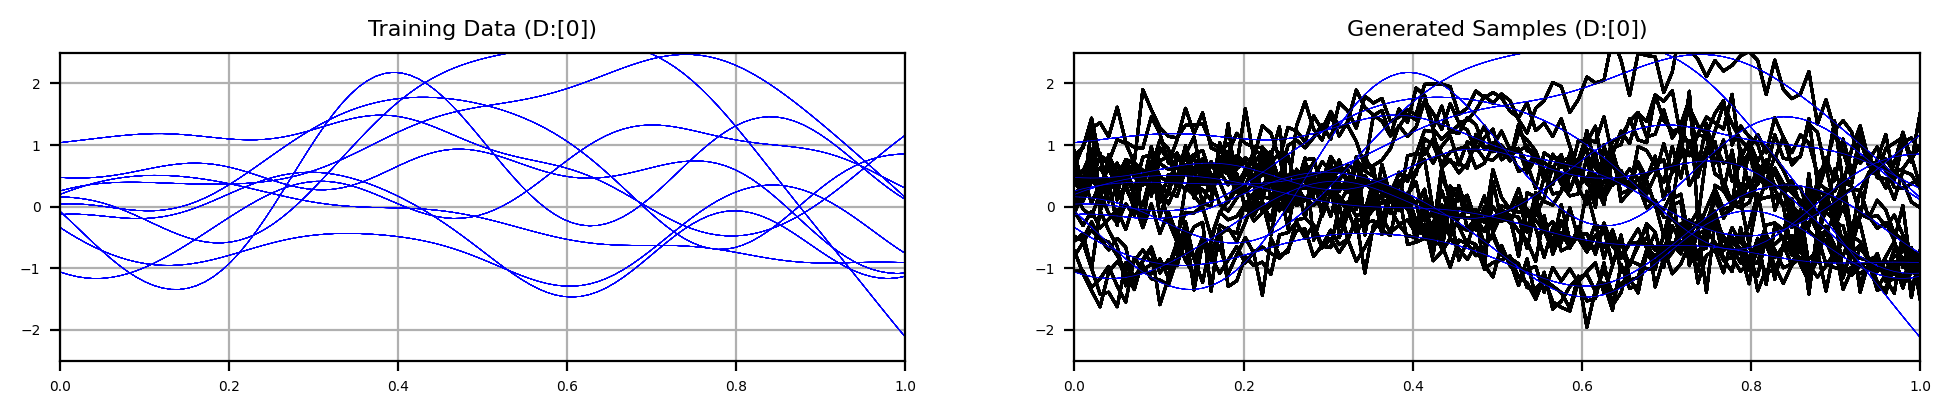

Done.


In [6]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.0,hyp_len_projection=0.0,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=0.0,acc_w=0.0,
    RKHS_PROJECTION_EACH_X_T=False,device='cpu')
print ("Done.")